In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from sklearn.discriminant_analysis import StandardScaler
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.ensemble import \
     (RandomForestClassifier as RFC,
      GradientBoostingClassifier as GBC,
      AdaBoostClassifier as ABC)
from sklearn.metrics import (accuracy_score,
                             log_loss, 
                             confusion_matrix,
                             ConfusionMatrixDisplay)

data = pd.read_csv('data.csv', sep=';')
data.sample(5)

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_validation, y_train_split, y_validation = skm.train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)

In [104]:
clf = RFC(criterion='entropy', max_features=X_train.shape[1], random_state=42)

clf = clf.fit(X_train_split, y_train_split)
print('Train set accuracy: %.4f' % accuracy_score(y_train_split, clf.predict(X_train_split)))
print('Test set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))

Train set accuracy: 1.0000
Test set accuracy: 0.7562


In [105]:
clf = RFC(criterion='entropy',max_features="sqrt", random_state=42)
clf = clf.fit(X_train_split, y_train_split)
print('Train set accuracy: %.4f' % accuracy_score(y_train_split, clf.predict(X_train_split)))
print('Test set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))

Train set accuracy: 1.0000
Test set accuracy: 0.7675


In [106]:
clf = ABC(learning_rate=0.1, random_state=42)
clf = clf.fit(X_train_split, y_train_split)
print('Train set accuracy: %.4f' % accuracy_score(y_train_split, clf.predict(X_train_split)))
print('Test set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))

c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train set accuracy: 0.7355
Test set accuracy: 0.7314


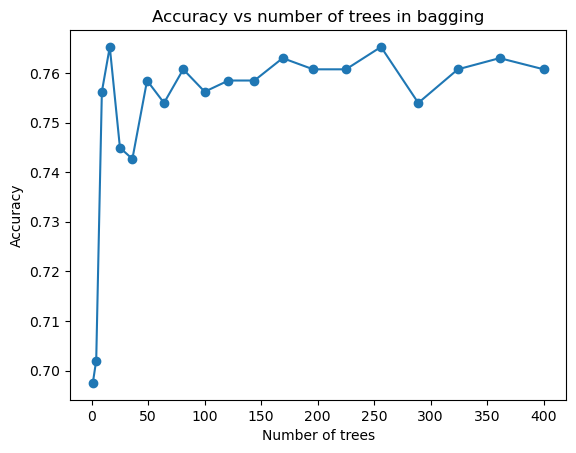

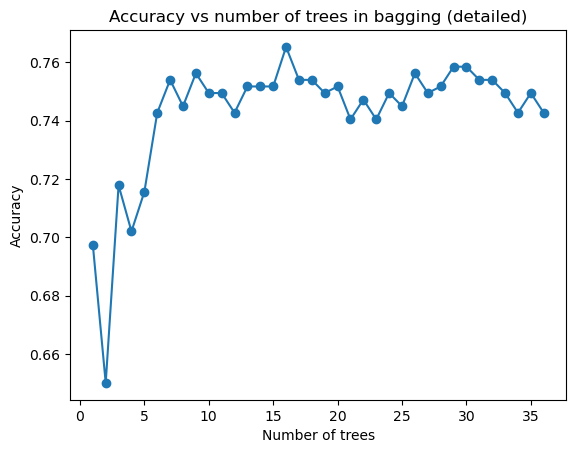

The following is the highest accuracy detected for bagging (number of trees is 16) => 0.7652370203160271


In [142]:
from sklearn.model_selection import GridSearchCV


parameters = {
    "samples_score": [],
    "detailed_samples": [],
    "features_score": [],
    "boosting_score": []
}

samples = [i**2 for i in range (1, 21)]
for i in samples:
    clf = RFC(criterion='entropy', n_estimators=i, max_features=X_train.shape[1], random_state=42)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["samples_score"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(samples, parameters["samples_score"])
plt.scatter(samples, parameters["samples_score"])
plt.title('Accuracy vs number of trees in bagging') 
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.show()

samples = [i for i in range (1, 37)]
for i in samples:
    clf = RFC(criterion='entropy', n_estimators=i, max_features=X_train.shape[1], random_state=42)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["detailed_samples"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(samples, parameters["detailed_samples"])
plt.scatter(samples, parameters["detailed_samples"])
plt.title('Accuracy vs number of trees in bagging (detailed)') 
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.show()

clf = RFC(criterion='entropy', n_estimators=16, max_features=X_train.shape[1], random_state=42)
clf = clf.fit(X_train_split, y_train_split)
print("The following is the highest accuracy detected for bagging (number of trees is 16) => " + str(accuracy_score(y_validation, clf.predict(X_validation))))

#### I did two estimates for bagging to find the optimal number of trees. The numbers of trees used in this experiment were powers of two of numbers 1 to 21. However, the estimates were a little unclear so I redid the experiment for numbers from 1 to 36. 
#### The final answer I came to was the number 16 of trees.

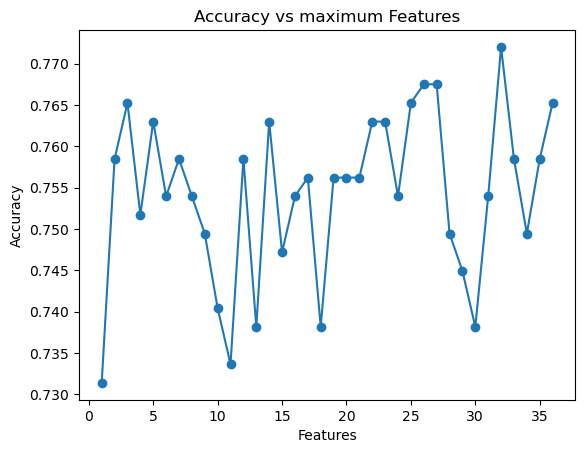

The following is the highest accuracy detected for random forests (number of trees is 16, number of features is 32) => 0.7720090293453724


In [108]:
feat = [i for i in range (1, 37)]
for i in feat:
    clf = RFC(criterion='entropy', n_estimators=16, max_features=i, random_state=42)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["features_score"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(feat, parameters["features_score"])
plt.scatter(feat, parameters["features_score"])
plt.title('Accuracy vs maximum Features') 
plt.ylabel('Accuracy')
plt.xlabel('Features')
plt.show()

clf = RFC(criterion='entropy', n_estimators=16, max_features=32, random_state=42)
clf = clf.fit(X_train_split, y_train_split)
print("The following is the highest accuracy detected for random forests (number of trees is 16, number of features is 32) => " + str(accuracy_score(y_validation, clf.predict(X_validation))))


#### Maximum number of features experimented on were ranged from 1 to 36. 36 being the total number of features in the given dataset.
#### The end result graph showed that the best maximum features for considering tree splitting is 32.
#### Interestingly, random forest had a higher accuracy than bagging. Although, the results might not be surprising considering I used the results of previous experiment and added the optimal number of estimators found then (16).

In [132]:
GridParam = {
    'learning_rate': np.linspace(0.01, 1, 40),
    'n_estimators': range (1, 101, 10)
    }
estimator = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = 0.001)
clf = ABC(random_state = 42, algorithm = "SAMME.R", estimator=estimator)

grid = GridSearchCV(estimator = clf, param_grid = GridParam, scoring = 'accuracy', cv = 10, n_jobs=-1)

grid.fit(X_train_split, y_train_split)

bestParams = grid.best_params_
bestAccuracy = grid.best_score_
print("Best learning rate is " + str(bestParams['learning_rate']) + ", while best number of estimators is "
 + str(bestParams['n_estimators']) +"\n" + "Accuracy for those parameters is " + str(bestAccuracy))
plt.show()


c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best learning rate is 0.06210526315789474, while best number of estimators is 71
Accuracy for those parameters is 0.7535786616557051


#### Using the best estimator found in the previous laboratory work, I fit gridsearch to find most optimal number of trees and learning rates. Unfortunately, the result turned out to be worse than bagging and random forest algorithms.

In [148]:
GridParam = {
    'learning_rate': np.linspace(0.01, 1, 20),
    'n_estimators': range (1, 101, 10)
    }
clf = ABC(random_state = 42)

grid = GridSearchCV(estimator = clf, param_grid = GridParam, scoring = 'accuracy', cv = 5, n_jobs=-1)

grid.fit(X_train_split, y_train_split)

bestParams = grid.best_params_
bestAccuracy = grid.best_score_
print("Best learning rate is " + str(bestParams['learning_rate']) + ", while best number of estimators is "
 + str(bestParams['n_estimators']) +"\n" + "Accuracy for those parameters is " + str(bestAccuracy))
plt.show()

c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best learning rate is 0.6352631578947369, while best number of estimators is 81
Accuracy for those parameters is 0.7674454114336339


#### The results for boosting turned out to be much better when I did it without using a pre prepared estimator. Additionally, for some reason, the accuracy of predictions improved when I decreased cross validation splits from 10 to 5. Perhaps reduced complexity of the grid made the search better?

In [147]:
GridParam = {
    'learning_rate': np.linspace(0.01, 1, 20),
    'n_estimators': range (1, 101, 10)
    }
clf = ABC(random_state = 42)

grid = GridSearchCV(estimator = clf, param_grid = GridParam, scoring = 'accuracy', cv = 10, n_jobs=-1)

grid.fit(X_train_split, y_train_split)

bestParams = grid.best_params_
bestAccuracy = grid.best_score_
print("Best learning rate is " + str(bestParams['learning_rate']) + ", while best number of estimators is "
 + str(bestParams['n_estimators']) +"\n" + "Accuracy for those parameters is " + str(bestAccuracy))
plt.show()

c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best learning rate is 0.6352631578947369, while best number of estimators is 61
Accuracy for those parameters is 0.7600260987576991


#### To prove my hypothesis I made the number of cross validation splits 5. The accuracy indeed worsened

In [149]:
clf = RFC(criterion='entropy', n_estimators=16, max_features=X_train.shape[1], random_state=42)
clf = clf.fit(X_train, y_train)
print('Validation set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

clf = RFC(criterion='entropy', n_estimators=16, max_features=32, random_state=42)
clf = clf.fit(X_train, y_train)
print('Validation set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

estimator = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = 0.001)
clf = ABC(learning_rate=0.06, n_estimators=71, random_state=42, estimator=estimator)
clf = clf.fit(X_train, y_train)
print('Validation set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

clf = ABC(learning_rate=0.6352631578947369, n_estimators=81, random_state=42)
clf = clf.fit(X_train, y_train)
print('Validation set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

clf = ABC(learning_rate=0.6352631578947369, n_estimators=61, random_state=42)
clf = clf.fit(X_train, y_train)
print('Validation set accuracy: %.4f' % accuracy_score(y_validation, clf.predict(X_validation)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

Validation set accuracy: 0.9955
Test set accuracy: 0.7548
Validation set accuracy: 0.9910
Test set accuracy: 0.7605


c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy: 0.9007
Test set accuracy: 0.7390


c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy: 0.7449
Test set accuracy: 0.7345


c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation set accuracy: 0.7517
Test set accuracy: 0.7424


#### For some reason, despite 'boosting with more cross validation splits' having lesser accuracy on training data, when tested, the accuracy of hyperparameters with 'more cross validation splits' is higher. The only difference between them is number of estimators, which are chosen closer to the default 50 for higher cross validation splits.
#### End results show that random forest accuracy is the highest among bagging, random forests and boosting methods. Additionally, adding a decision tree from previous lab work as an estimator for Ada Boosting Classifier only significantly increases the accuracy of predictions on validation set. 